<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/pokemon.csv"
df = pd.read_csv(filename)

1.Analisis y Depuracion de Datos

In [2]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
# Realizaremos un drop para todas las lineas nulas
df2=df
#df2 = df2.dropna(subset=["Type 2"])
#df2.info()

In [4]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("pokemon.xlsx", index=False)

In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.

import pandas as pd

corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


2. Creacion y Optimizacion de Modelo Predictivo

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Preparamos el dataset

In [8]:
X = df2[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values
y = df2['Type 1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [9]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.19


Resultados obtenidos

In [10]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[12  1  0  1  0  3  2  0  2  1  1  0  2  0  0  1  0  0]
 [ 1  2  2  0  0  1  1  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  1  4  0  0  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 3  1  0  1  0  0  2  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  2  0  0  0  0  0  2]
 [ 1  0  0  0  1  1  1  0  2  0  0  0  0  0  0  0  0  0]
 [ 2  1  2  2  1  2  4  0  0  1  1  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  0  2  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 1  0  1  3  0  2  1  0  4  3  2  0  2  0  0  0  0  0]
 [ 0  0  0  1  0  3  1  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  4  1  0  0  0  0  1  0  0  0  1  2]
 [ 4  1  2  1  0  3  0  0  1  3  3  0 10  0  0  0  0  2]
 [ 0  0  0  0  0  1  0  0  0  0  1  0  3  0  0  0  0  1]
 [ 4  2  5  1  0  1  0  0  0  2  1  0  1  0  3  0  0  1]
 [ 2  1  1  1  0  3  0  0  3  1  1  0  0  0  0  2  0  0]
 [ 1  1  0  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0]
 [ 8  0  4  2  0  3  0  0  4  3

Arbol de Decision

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

[[0.07246377 0.01449275 0.02898551 ... 0.02898551 0.         0.10144928]
 [0.05747126 0.08045977 0.06896552 ... 0.04597701 0.03448276 0.10344828]
 [0.15384615 0.23076923 0.         ... 0.23076923 0.         0.07692308]
 ...
 [0.         0.01052632 0.03157895 ... 0.06315789 0.04210526 0.32631579]
 [0.07246377 0.01449275 0.02898551 ... 0.02898551 0.         0.10144928]
 [0.         0.         0.125      ... 0.125      0.         0.        ]]
Esta instancia pertenece a la clase ['Fire' 'Fire' 'Dark' 'Normal' 'Fire' 'Dark' 'Water' 'Fire' 'Dark' 'Water'
 'Electric' 'Fighting' 'Bug' 'Water' 'Rock' 'Fighting' 'Rock' 'Fighting'
 'Normal' 'Ground' 'Normal' 'Normal' 'Rock' 'Fighting' 'Fire' 'Water'
 'Bug' 'Electric' 'Water' 'Water' 'Water' 'Dragon' 'Fighting' 'Water'
 'Fire' 'Normal' 'Fire' 'Water' 'Water' 'Fire' 'Psychic' 'Fire' 'Fighting'
 'Water' 'Fire' 'Fire' 'Normal' 'Normal' 'Normal' 'Electric' 'Fire' 'Rock'
 'Normal' 'Water' 'Dragon' 'Rock' 'Fire' 'Rock' 'Water' 'Fire' 'Fire'
 'Fighting' 

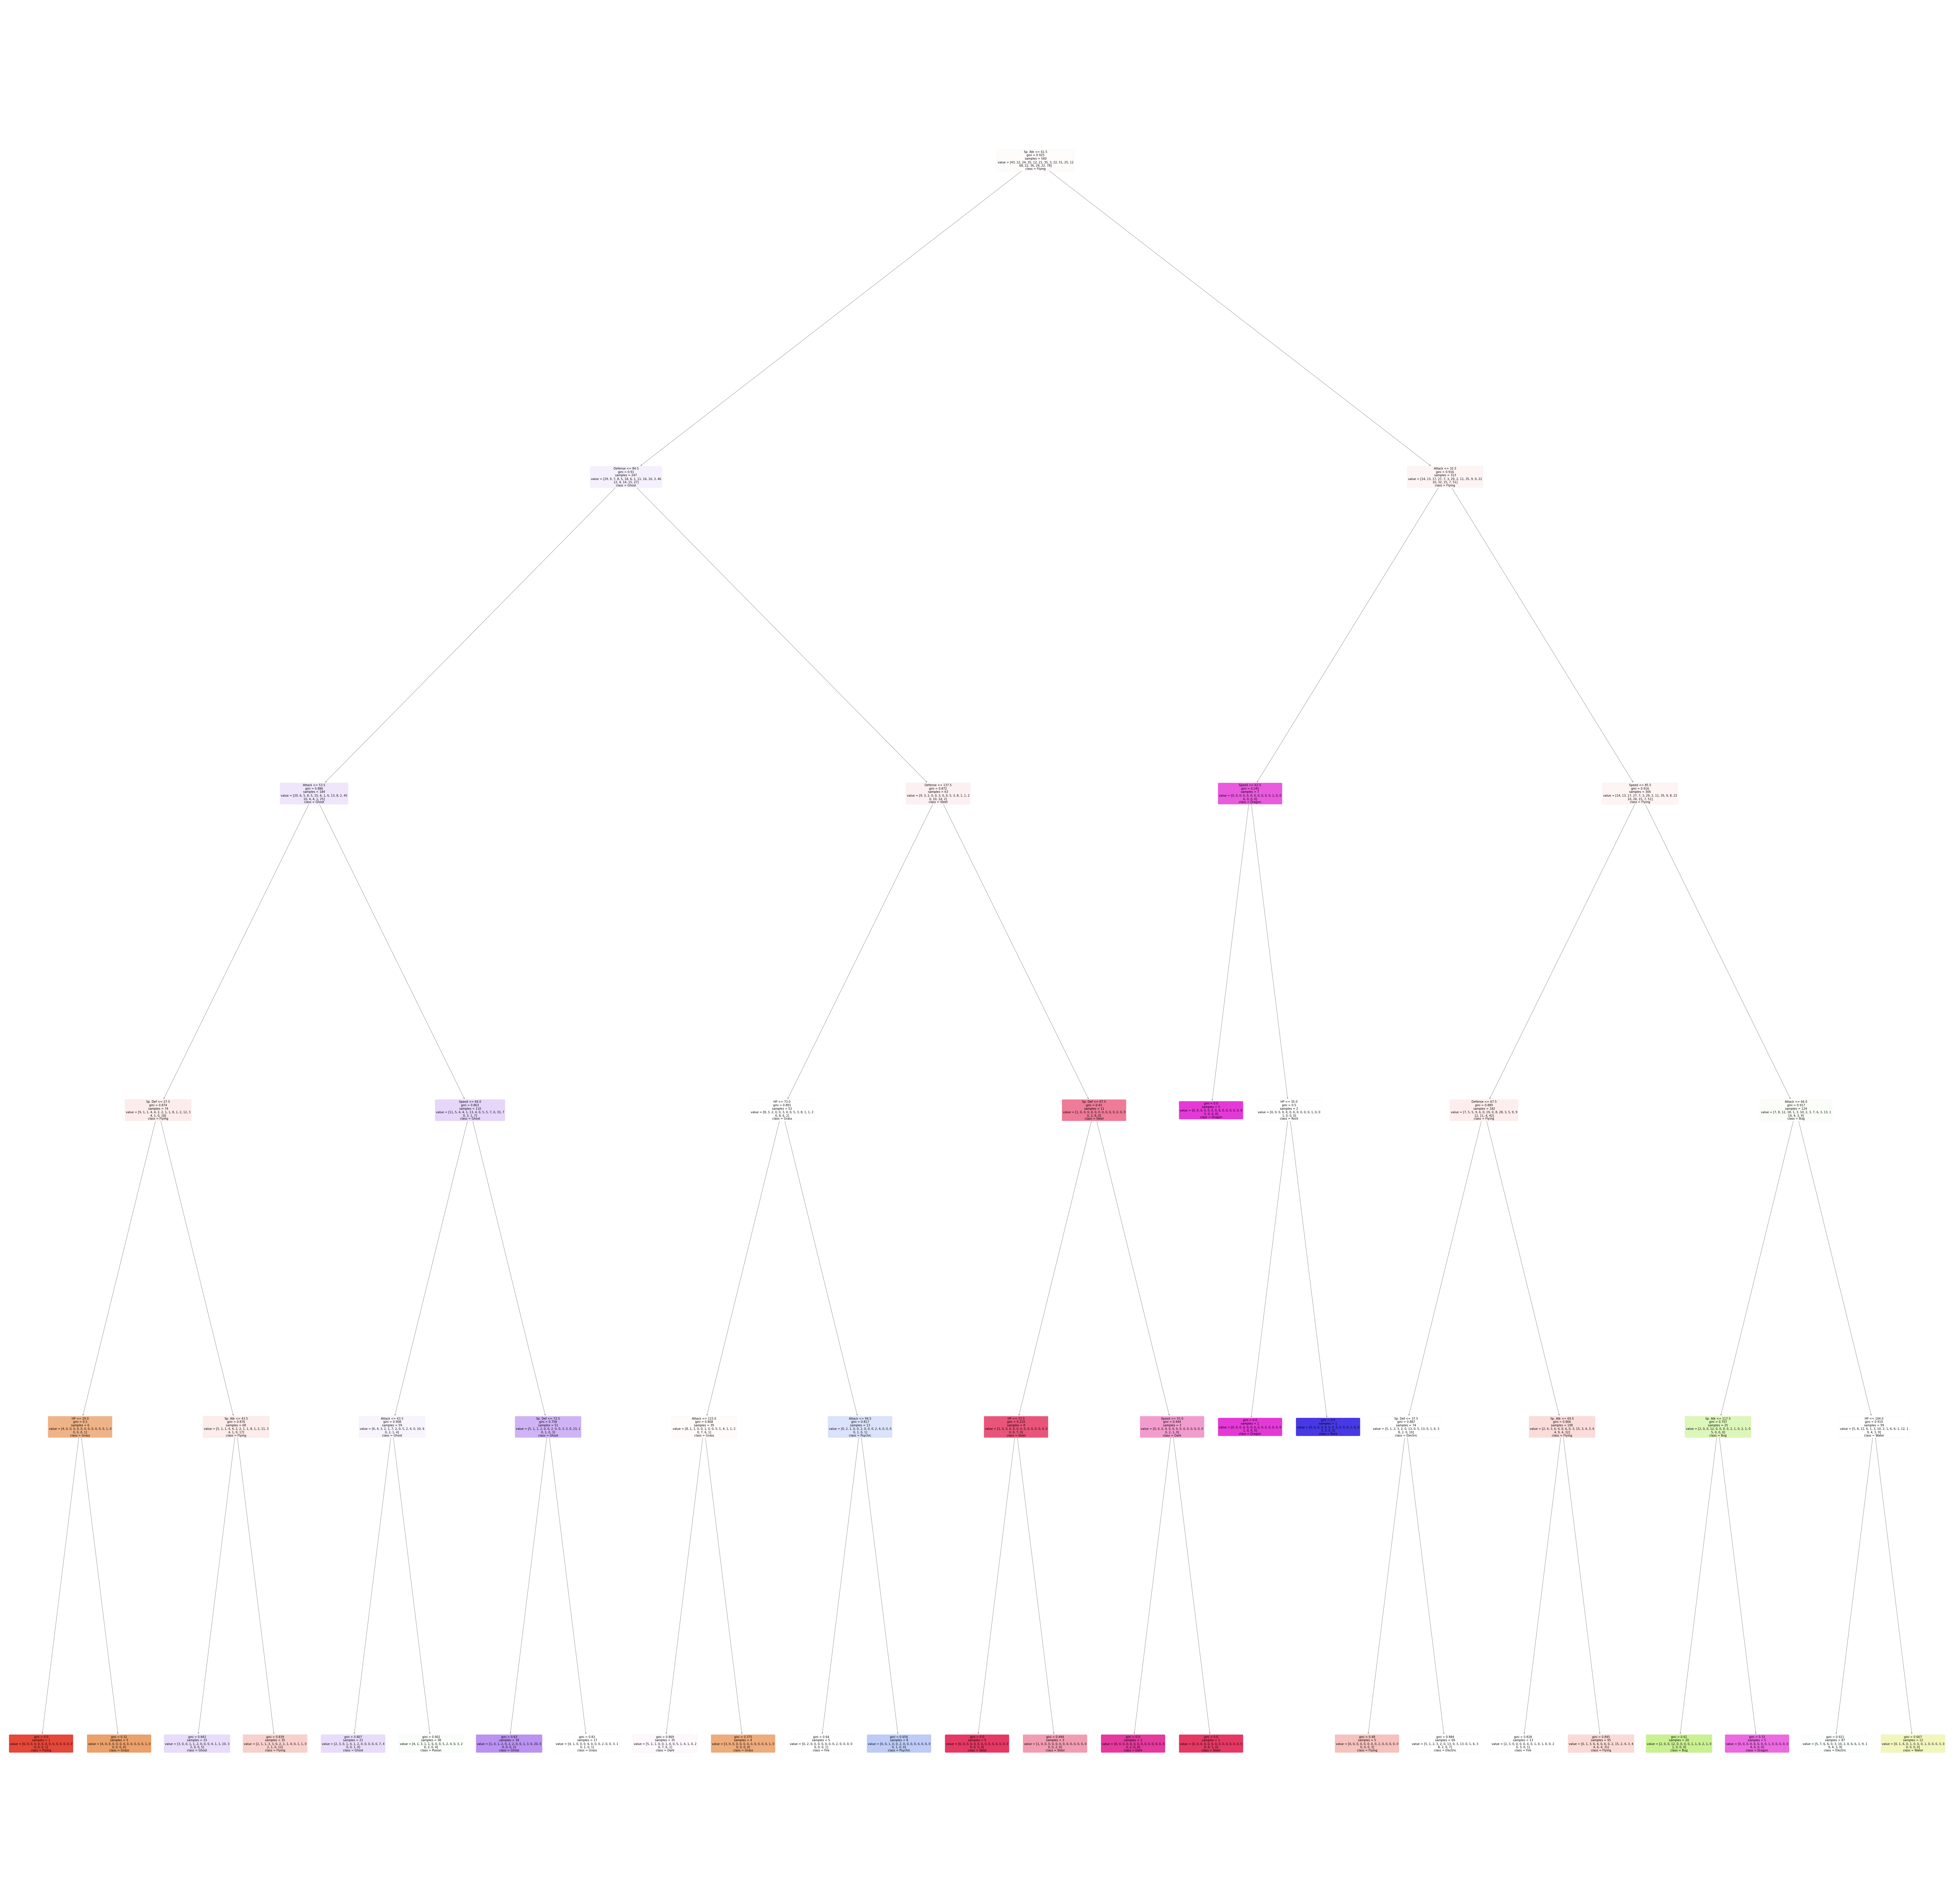

In [12]:
X=df2[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values
y=df2['Type 1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
plt.figure(figsize=(120,120))
tree.plot_tree(
    tree_clf,
    feature_names=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
    class_names=['Grass','Fire','Water','Bug','Normal','Poison','Electric','Ground','Fairy','Fighting','Psychic','Rock','Ghost','Ice','Dragon','Dark','Steel','Flying'],
    rounded=True,
    filled=True
)
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

In [13]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 4  1  0  1  0  3  1  0  0  0  1  0  5  0  1  5  0  4]
 [ 2  0  0  0  0  2  4  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  2  0  0  2  2  0  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  1  5  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  2  0  0  0  1  2  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  1 10  0  0  0  0  0  0  0  1  0  0  3]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  1  0  0  0  2  0  0  0  2  0  0  2]
 [ 0  1  0  1  0  0  7  0  0  0  0  0  3  0  0  2  0  5]
 [ 0  1  0  0  0  2  0  0  0  0  1  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  0  0  0  0  0  0  0  0  0  1  6]
 [ 3  3  0  0  0  4  2  0  0  0  4  0 10  0  1  0  0  3]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  3  0  0  1  0  1]
 [ 0  0  4  4  0  0  6  0  0  0  0  0  1  0  0  0  0  6]
 [ 0  0  0  0  0  1  2  0  0  0  1  0  2  0  0  5  1  3]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  1  0  0  0  0  1]
 [ 2  2  0  1  0  4 11  0  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=195)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[ 6  0  0  0  1  0  0  0  1  1  3  0  6  0  1  3  1  3]
 [ 1  1  1  0  0  0  3  0  0  0  0  0  2  0  0  1  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  2  0  1  0  0  0  0  3]
 [ 1  1  0  0  0  0  2  1  0  1  0  0  1  0  1  0  0  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  3]
 [ 0  1  0  0  0  2  1  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  2  1  0  2  6  0  0  0  1  0  1  0  0  1  0  3]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  2  0  1  0  0  0  4  1  0  0]
 [ 0  1  1  3  0  1  0  0  0  3  0  1  2  0  0  0  2  5]
 [ 0  0  0  1  0  2  0  0  0  0  1  0  2  0  0  1  0  0]
 [ 0  0  0  1  1  0  1  0  0  3  0  0  1  0  0  0  1  4]
 [ 2  0  0  0  0  3  0  0  0  0  2  0 11  0  1  0  0 11]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  4  0  0  0  0  1]
 [ 0  1  2  4  0  0  0  1  0  1  0  0  1  0  7  0  0  4]
 [ 0  0  1  1  0  0  1  0  0  0  1  0  0  1  1  4  4  1]
 [ 2  1  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 2  0  1  3  1  0  2  0  0  5

0.21666666666666667

Regresion Logistica

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[ 0  0  0  0  0  1  0  0  0  1  1  0  5  0  2  2  3 11]
 [ 0  0  1  0  0  0  3  0  0  0  1  0  2  0  0  1  0  1]
 [ 0  0  1  0  0  1  3  0  0  0  1  0  1  0  1  0  0  0]
 [ 0  0  0  2  0  0  1  0  0  2  0  0  1  0  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  3]
 [ 1  0  0  0  0  1  1  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  2  2  1  1  0  0  0  1  0  0  2  0  0  0  1  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  2  0  0  0  0  0  1  0  0  0  0  0  3  1  2]
 [ 0  0  0  2  0  0  2  0  0  4  1  0  1  0  1  0  0  8]
 [ 0  0  0  1  0  1  0  0  0  0  3  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  0  0  1  0  0  1  0  1  0  1  5]
 [ 0  0  1  0  0  1  0  0  0  0  0  0 20  0  1  0  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  1  3]
 [ 0  0  0  0  2  1  3  0  0  1  0  0  1  0  4  0  0  9]
 [ 0  0  0  0  0  1  1  0  0  0  1  0  0  0  0  4  5  3]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  1  0  0  0  0  0  1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

0.23333333333333334